# Quantum Computation Seminar #2

Mar 23rd, 2020

By Ryosuke Goto, Search Space Inc. With Shojiri Breadboard


## 1. Qbit and its representation

### Checking a Qbit with a simple circuit

Let's see how a primitive Qbit looks like, by loading Qiskit and creating a minimum cicuit.

In [93]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')


Total count for 0 and 1 are: {'0': 1000}


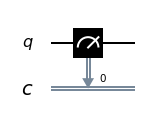

In [94]:
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(1, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0], [0])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 0 and 1 are:", counts)

# Draw the circuit
circuit.draw()

In [ ]:
plot_histogram(counts)

## 2. Basic Quantum Gates

### Pauli.X

First, We defne a utitlity function to test some circuits in turn.

In [85]:
def run_job_and_measure(circuit, simulator):
    job = execute(circuit, simulator, shots=1000)
    result = job.result()
    counts = result.get_counts(circuit)
    
    print("\nTotal count for 0 and 1 are:", counts)
    return counts

Let's add X gate to the circuit and see how it runs.

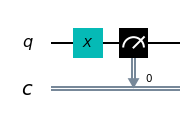

In [86]:
circuit = QuantumCircuit(1, 1)

circuit.x(0)
circuit.measure([0], [0])
circuit.draw()

In [87]:
counts = run_job_and_measure(circuit, simulator)


Total count for 0 and 1 are: {'1': 1000}


How about adding X gate twice?

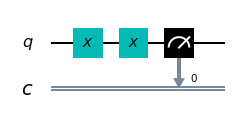

In [91]:
circuit = QuantumCircuit(1, 1)

circuit.x(0)
circuit.x(0)
circuit.measure([0], [0])
circuit.draw()

In [92]:
run_job_and_measure(circuit, simulator)


Total count for 0 and 1 are: {'0': 1000}


{'0': 1000}

### Hadamnard Gate

Then, Let's add Hadamard gate to the circuit and see how it runs.

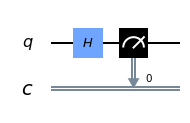

In [88]:
circuit = QuantumCircuit(1, 1)

circuit.h(0)
circuit.measure([0], [0])
circuit.draw()

In [89]:
counts = run_job_and_measure(circuit, simulator)


Total count for 0 and 1 are: {'0': 500, '1': 500}


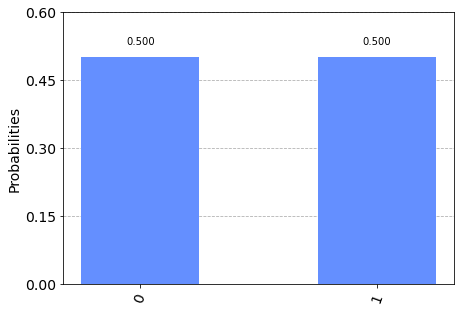

In [90]:
plot_histogram([counts])

## 3. Matrices and Multiple Qbit Operations


### CNOT Gate

Let'a make a 3-Qbit circuit

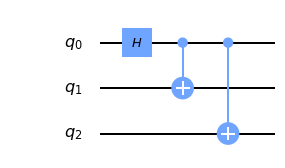

In [97]:
circuit = QuantumCircuit(3)

# Add a H gate on qubit 0, putting this qubit in superposition.
circuit.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circuit.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circuit.cx(0, 2)

circuit.draw()

### Statevector backend

The most common backend in Qiskit Aer is the `statevector_simulator`. This simulator returns the quantum 
state, which is a complex vector of dimensions $2^n$, where $n$ is the number of qubits 
(so be careful using this as it will quickly get too large to run on your machine).

In [100]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

# Create a Quantum Program for execution 
job = execute(circuit, backend)

result = job.result()

outputstate = result.get_statevector(circuit, decimals=3)
print(outputstate)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


Qiskit also provides a visualization toolbox to allow you to view these results.

Below, we use the visualization function to plot the real and imaginary components of the state density matrix $\rho$.

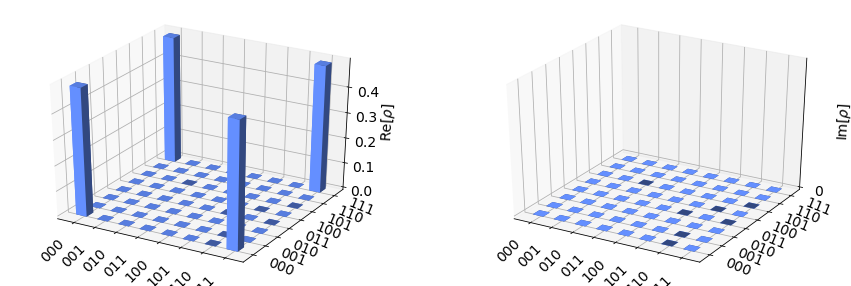

In [101]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

### Unitary backend

Qiskit Aer also includes a `unitary_simulator` that works _provided all the elements in the circuit are unitary operations_. This backend calculates the $2^n \times 2^n$ matrix representing the gates in the quantum circuit. 

In [107]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(circuit, backend)
result = job.result()

# Show the results
print(result.get_unitary(circuit, decimals=3))

[[ 0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]]


### OpenQASM backend

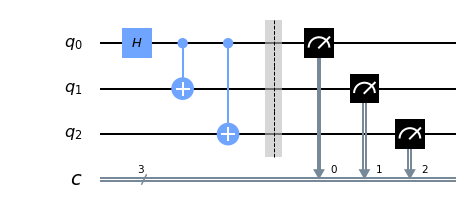

In [109]:
# Create a Quantum Circuit
measure = QuantumCircuit(3, 3)
measure.barrier(range(3))
# map the quantum measurement to the classical bits
measure.measure(range(3),range(3))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circuit+measure

#drawing the circuit
qc.draw()

This circuit adds a classical register, and three measurements that are used to map the outcome of qubits to the classical bits. 

To simulate this circuit, we use the ``qasm_simulator`` in Qiskit Aer. Each run of this circuit will yield either the bitstring 000 or 111. To build up statistics about the distribution of the bitstrings (to, e.g., estimate $\mathrm{Pr}(000)$), we need to repeat the circuit many times. The number of times the circuit is repeated can be specified in the ``execute`` function, via the ``shots`` keyword.

In [110]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

Once you have a result object, you can access the counts via the function `get_counts(circuit)`. This gives you the _aggregated_ binary outcomes of the circuit you submitted.

In [112]:
counts = result_sim.get_counts(qc)
print(counts)

{'111': 533, '000': 491}


Approximately 50 percent of the time, the output bitstring is 000. Qiskit also provides a function `plot_histogram`, which allows you to view the outcomes. 

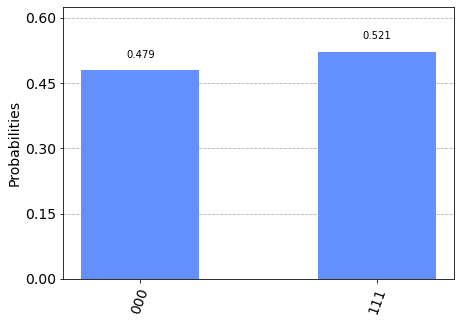

In [114]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

The estimated outcome probabilities $\mathrm{Pr}(000)$ and  $\mathrm{Pr}(111)$ are computed by taking the aggregate counts and dividing by the number of shots (times the circuit was repeated). Try changing the ``shots`` keyword in the ``execute`` function and see how the estimated probabilities change.

## 4. Running circuits from the IBM Q account <a name='ibmq'></a>

To access IBM Q devices, you'll need an API token. You can generate, or view, your API token [here](https://quantum-computing.ibm.com/account) (create an account if you don't already have one).

In [115]:
from qiskit import IBMQ

After generating your API token, call: `IBMQ.save_account('MY_TOKEN')`.

In [118]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

Once your account has been loaded, you have one or more providers available to you

In [119]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

Each provider gives access to a selection of services (e.g. Backends) that is authorized by your account.  To see the backends available to a given provider, first select the provider by hub, group, project, or a combination thereof:

In [120]:
provider = IBMQ.get_provider(group='open')

then ask the provider to list its backends:

In [121]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>]

### Running circuits on real devices

Today's quantum information processors are small and noisy, but are advancing at a fast pace. They provide a great opportunity to explore what [noisy, intermediate-scale quantum (NISQ)](https://arxiv.org/abs/1801.00862) computers can do.

Let us now grab a backend from the provider on which to run our quantum circuit:

In [122]:
backend = provider.get_backend('ibmq_essex')

To run the circuit on the given device we use `execute`.  Sometimes the devices are busy with jobs from other users.  Your job is added to the list of pending jobs called the queue, and executed in this queue order.  To monitor the status of our job through the process, we can use the `job_monitor`

<div class="alert alert-block alert-warning">
    <b>Info:</b> The <code>execute</code> functions does much more than just send your circuit(s) to a backend.  This functionality can be explored in <a href=5_using_the_transpiler.ipynb>Part 5: Using the transpiler.</a></div>

In [123]:
from qiskit.tools.monitor import job_monitor

job_exp = execute(qc, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


``job_exp`` has a ``.result()`` method that lets us get the results from running our circuit.

<div class="alert alert-block alert-info">
<b>Note:</b> When the .result() method is called, the code block will wait until the job has finished before releasing the cell.
</div>

In [126]:
result_exp = job_exp.result()

Like before, the counts from the execution can be obtained using ```get_counts(qc)``` 

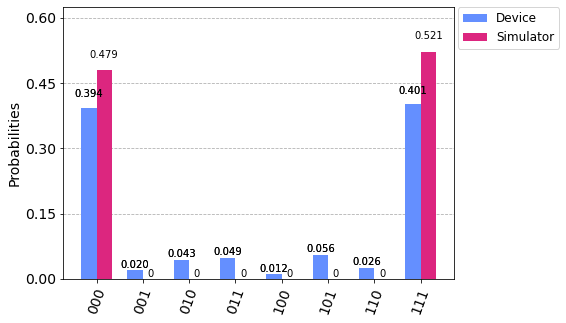

In [127]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

### Retrieving a previously run job

If your experiment takes longer to run then you have time to wait around, or if you simply want to retrieve old jobs, the IBM Q backends allow you to do that.
First, you would need to note your job's ID:

In [128]:
job_id = job_exp.job_id()

print('JOB ID: {}'.format(job_id))

JOB ID: 5ec672c3d6ae610013e6aab9


Given a job ID, that job object can be later reconstructed from the backend using ```retrieve_job```:

In [129]:
retrieved_job = backend.retrieve_job(job_id)

and then the results can be obtained from the new job object. 

In [130]:
retrieved_job.result().get_counts(qc)

{'000': 403,
 '111': 411,
 '001': 20,
 '100': 12,
 '101': 57,
 '010': 44,
 '011': 50,
 '110': 27}